# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set lists for response data

city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
wind = []
temp = []


In [4]:
# Open file to write results of API calls 
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for city in cities:
    query_url = f"{url}q={city}&units=Imperial&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        lat.append(lat_val)
        lng.append(lon_val)
        date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
            # Exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city}, was not found in the Weathermap API\n")
        myprintlog.write(f"{city} was not found in the Weathermap API\n")
        
         # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        lat.append(None)
        lng.append(None)
        date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind.append(None)
        pass

    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()    



Bilibino with city ID:2126682 was found in the Weathermap API

nguiu, was not found in the Weathermap API

Puerto Ayora with city ID:3652764 was found in the Weathermap API

El Peñol with city ID:3683508 was found in the Weathermap API

Hermanus with city ID:3366880 was found in the Weathermap API

Saurimo with city ID:145531 was found in the Weathermap API

New Norfolk with city ID:2155415 was found in the Weathermap API

Ilebo with city ID:215976 was found in the Weathermap API

hihifo, was not found in the Weathermap API

Kumul with city ID:1529484 was found in the Weathermap API

Tarko-Sale with city ID:1490085 was found in the Weathermap API

Mar del Plata with city ID:3430863 was found in the Weathermap API

Malmo with city ID:2692969 was found in the Weathermap API

Lebu with city ID:3883457 was found in the Weathermap API

Mandalgovi with city ID:2030065 was found in the Weathermap API

Busselton with city ID:2075265 was found in the Weathermap API

Tura with city ID:1254046 wa

Hithadhoo with city ID:1282256 was found in the Weathermap API

sentyabrskiy, was not found in the Weathermap API

Laguna with city ID:5364271 was found in the Weathermap API

Awjilah with city ID:88533 was found in the Weathermap API

Ponta Delgada with city ID:3372783 was found in the Weathermap API

Cherskiy with city ID:2126199 was found in the Weathermap API

Camaná with city ID:3945985 was found in the Weathermap API

artyk, was not found in the Weathermap API

Neuquén with city ID:3843123 was found in the Weathermap API

Tabou with city ID:2281120 was found in the Weathermap API

Jashpurnagar with city ID:1269177 was found in the Weathermap API

San Cristobal with city ID:3628473 was found in the Weathermap API

George Town with city ID:1735106 was found in the Weathermap API

Bocas del Toro with city ID:3713959 was found in the Weathermap API

Aykhal with city ID:2027296 was found in the Weathermap API

Seoni Mālwa with city ID:1256823 was found in the Weathermap API

seoni mal

Torit with city ID:365742 was found in the Weathermap API

Ambilobe with city ID:1082243 was found in the Weathermap API

Sinnamary with city ID:3380290 was found in the Weathermap API

Puerto Carreño with city ID:3671519 was found in the Weathermap API

Oktyabr'skoye with city ID:515805 was found in the Weathermap API

lolua, was not found in the Weathermap API

Palembang with city ID:1633070 was found in the Weathermap API

Guerrero Negro with city ID:4021858 was found in the Weathermap API

aybak, was not found in the Weathermap API

Ponta do Sol with city ID:2264557 was found in the Weathermap API

Yazman with city ID:1162316 was found in the Weathermap API

Nísia Floresta with city ID:3393922 was found in the Weathermap API

Evensk with city ID:2125693 was found in the Weathermap API

Fes with city ID:2548885 was found in the Weathermap API

Jalu with city ID:86049 was found in the Weathermap API

Zheleznodorozhnyy with city ID:463355 was found in the Weathermap API

Mitsamiouli w

Saint-Pierre with city ID:935214 was found in the Weathermap API

Şebinkarahisar with city ID:739914 was found in the Weathermap API

sebinkarahisar, was not found in the Weathermap API

Mumford with city ID:2297810 was found in the Weathermap API

Mulegé with city ID:3995236 was found in the Weathermap API

Khatanga with city ID:2022572 was found in the Weathermap API

Gravdal with city ID:3155152 was found in the Weathermap API

Tocopilla with city ID:3869716 was found in the Weathermap API

Mehamn with city ID:778707 was found in the Weathermap API

Khorinsk with city ID:2022304 was found in the Weathermap API

Harpanahalli with city ID:1270287 was found in the Weathermap API

Nampula with city ID:1033356 was found in the Weathermap API

Hasaki with city ID:2112802 was found in the Weathermap API

Baruun-Urt with city ID:2032614 was found in the Weathermap API

Teya with city ID:1489656 was found in the Weathermap API

Borås with city ID:2720501 was found in the Weathermap API

Camo

louisbourg, was not found in the Weathermap API

Pristen' with city ID:505154 was found in the Weathermap API

Mersing with city ID:1732826 was found in the Weathermap API

Kirkconnel with city ID:2645291 was found in the Weathermap API

Novobureyskiy with city ID:2018964 was found in the Weathermap API

Okhotsk with city ID:2122605 was found in the Weathermap API

Ulkan with city ID:2020208 was found in the Weathermap API

Alanya with city ID:324190 was found in the Weathermap API

Amazar with city ID:2027806 was found in the Weathermap API

Wanning with city ID:1791779 was found in the Weathermap API

tsienyane, was not found in the Weathermap API

Otradnoye with city ID:513898 was found in the Weathermap API

Olinda with city ID:3393536 was found in the Weathermap API

Balabac with city ID:1728675 was found in the Weathermap API

Hamilton with city ID:4513583 was found in the Weathermap API

Knysna with city ID:988698 was found in the Weathermap API

Isil'kul' with city ID:1505438 w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary from the lists that we created above
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "latitude": lat,
    "longitude": lng,
    "date": date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind": wind
}

# Use the dictionary to create a dataframe named weather_data
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_id,city_name,latitude,longitude,date,temp,humidity,cloudiness,wind
0,2126682.0,Bilibino,68.05,166.44,08/11/20,38.32,82.0,85.0,1.05
1,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
2,3652764.0,Puerto Ayora,-0.74,-90.35,08/11/20,70.02,73.0,75.0,8.05
3,3683508.0,El Peñol,1.46,-77.45,08/11/20,75.20,50.0,40.0,6.93
4,3366880.0,Hermanus,-34.42,19.23,08/11/20,54.00,84.0,48.0,8.99


In [6]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
# First drop the NaN values
weather_data_values = weather_data.dropna()

# Reset the index (it will have gaps in it where the NaN value rows have been deleted)
weather_data_values = weather_data_values.reset_index(drop=True)

# Change the datatype for the city_id field to an integer (it gets created as a float)
weather_data_values['city_id'] = weather_data_values['city_id'].astype(int)
weather_data_values.head()

,city_id,city_name,latitude,longitude,date,temp,humidity,cloudiness,wind
0,2126682,Bilibino,68.05,166.44,08/11/20,38.32,82.0,85.0,1.05
1,3652764,Puerto Ayora,-0.74,-90.35,08/11/20,70.02,73.0,75.0,8.05
2,3683508,El Peñol,1.46,-77.45,08/11/20,75.20,50.0,40.0,6.93
3,3366880,Hermanus,-34.42,19.23,08/11/20,54.00,84.0,48.0,8.99
4,145531,Saurimo,-9.66,20.39,08/11/20,78.01,18.0,0.0,3.31


In [11]:
weather_data_values.to_csv("cities.csv", index = False, encoding="utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

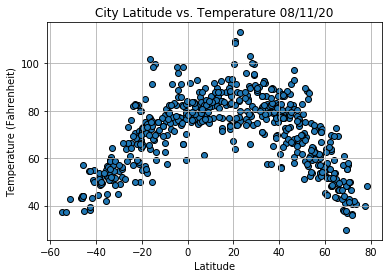

In [7]:

# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values['date'][0]
plt.scatter(weather_data_values["latitude"], weather_data_values["temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

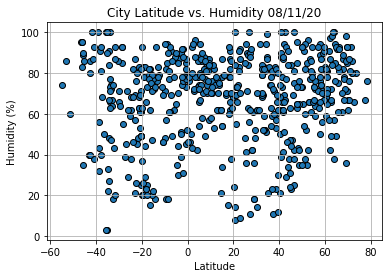

In [8]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["latitude"], weather_data_values["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

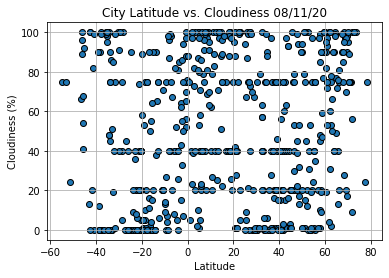

In [9]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["latitude"], weather_data_values["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

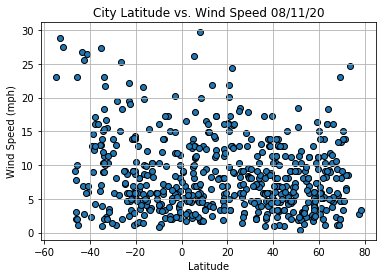

In [10]:

# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values["latitude"], weather_data_values["wind"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [41]:
# Create Northern and Southern Hemisphere DataFrames
# Make a function that accepts a list of x values and y values, a description for the x and y axes,
# a string that describes which hemisphere is being analyzed and a filename to use while saving the figure
# and finally the x,y coordinates to create the annotation of the equation on the graph
def plot_reg(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Images/{filename}')
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames
crit_north = weather_data_values.latitude >= 0
crit_south = weather_data_values.latitude < 0

north_weather = weather_data_values[crit_north]
south_weather = weather_data_values[crit_south]

north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()
#south_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7117624717035649
y = -0.51x + 91.74


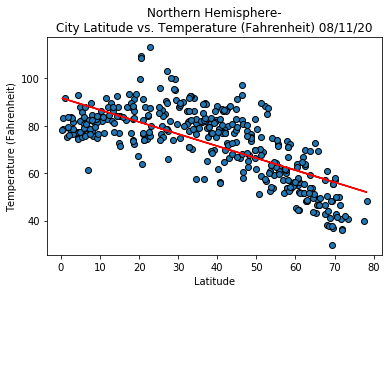

In [42]:
plot_reg(north_weather["latitude"],north_weather["temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,-20)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8007045535335118
y = 0.84x + 84.03


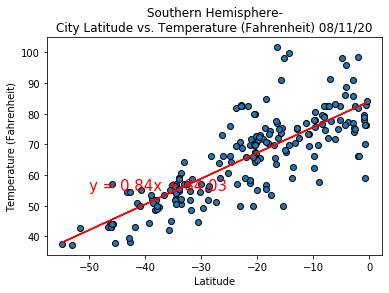

In [44]:
plot_reg(south_weather["latitude"],south_weather["temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06802967256313738
y = 0.06x + 66.97


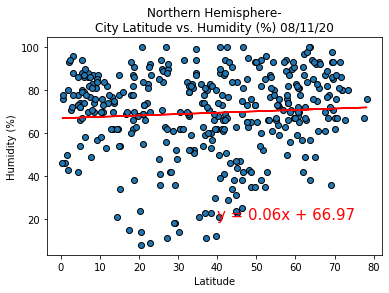

In [45]:
plot_reg(north_weather["latitude"],north_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.018498222536761675
y = -0.03x + 63.65


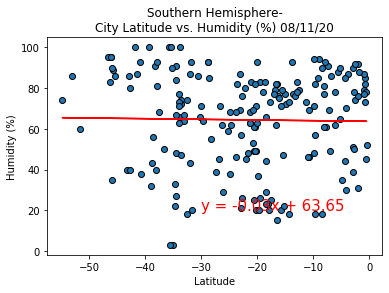

In [46]:
plot_reg(south_weather["latitude"],south_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0280580516835594
y = -0.05x + 55.49


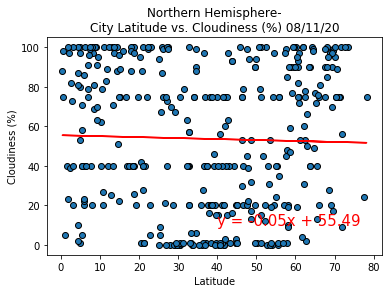

In [47]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.051781879137860184
y = -0.14x + 38.71


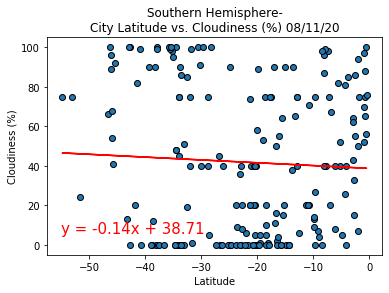

In [48]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1256681844920963
y = -0.03x + 9.15


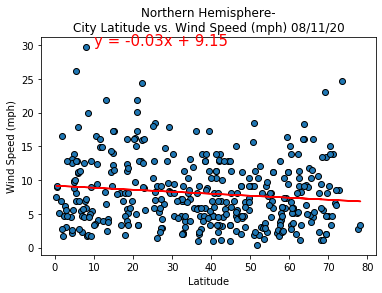

In [50]:
plot_reg(north_weather["latitude"],north_weather["wind"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.32214427983658933
y = -0.15x + 5.69


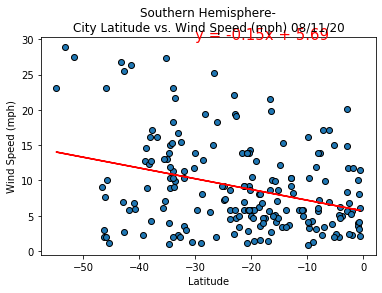

In [52]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)